# Construção da Base de Dados

## Tratamento dos Dados


### Importação das Bibliotecas e Acesso ao Google Drive


In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importação do dataset Movies

In [ ]:
df_movies = pd.read_csv('/content/drive/MyDrive/Sistema de Recomendação/movies.csv')
print(df_movies.columns)

Index(['movieId', 'title', 'genres'], dtype='object')


### Remoção da coluna "title"

In [ ]:
#coluna_removida = 'title'
#df_1 = df_movies.drop(coluna_removida, axis=1)
#print(df_1.columns)

### Importação do dataset Ratings

In [ ]:
df_ratings = pd.read_csv('/content/drive/MyDrive/Sistema de Recomendação/ratings.csv')
print(df_ratings.columns)

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


### Remoção da coluna "timestamp"

In [ ]:
coluna_removida = 'timestamp'
df_2 = df_ratings.drop(coluna_removida, axis=1)
print(df_movies.columns)

Index(['movieId', 'title', 'genres'], dtype='object')


### Merge dos datasets "Movies" e "Ratings"

In [ ]:
merged_df = pd.merge(df_movies, df_2)
print(merged_df.columns)


Index(['movieId', 'title', 'genres', 'userId', 'rating'], dtype='object')


### Visualização das colunas

In [ ]:
merged_df.head(10)

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0


### Visualização de quantos filmes apresentam o gênero "children"

In [ ]:
merged_df[merged_df["genres"] == "Children"]

,movieId,title,genres,userId,rating
9477,343,"Baby-Sitters Club, The (1995)",Children,6,3.0
9478,343,"Baby-Sitters Club, The (1995)",Children,43,4.0
9479,343,"Baby-Sitters Club, The (1995)",Children,307,1.5
9480,343,"Baby-Sitters Club, The (1995)",Children,429,3.0
9481,343,"Baby-Sitters Club, The (1995)",Children,600,3.0
31677,1426,Zeus and Roxanne (1997),Children,599,1.0
99759,152658,Santa's Little Helper (2015),Children,448,1.5
100736,183301,The Tale of the Bunny Picnic (1986),Children,599,3.0


### Criação da coluna "is_children"

In [ ]:
merged_df['is_children'] = merged_df['genres'].apply(lambda x: 1 if 'Children' in x else 0)


### Contagem da quantidade de filmes que possuiam "children" no gênero

In [ ]:
merged_df['is_children'].value_counts()

0    91628
1     9208
Name: is_children, dtype: int64

### Eliminação das linhas que possuiam "children" no gênero

In [ ]:
df = merged_df[merged_df["is_children"] != 1]
df

,movieId,title,genres,userId,rating,is_children
325,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,0
326,3,Grumpier Old Men (1995),Comedy|Romance,6,5.0,0
327,3,Grumpier Old Men (1995),Comedy|Romance,19,3.0,0
328,3,Grumpier Old Men (1995),Comedy|Romance,32,3.0,0
329,3,Grumpier Old Men (1995),Comedy|Romance,42,4.0,0
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,0
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,0
100833,193585,Flint (2017),Drama,184,3.5,0
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,0


In [ ]:
df['is_children'].value_counts()

0    91628
Name: is_children, dtype: int64

### Remoção da coluna "genres"

In [ ]:
coluna_removida = 'genres'
df = df.drop(coluna_removida, axis=1)
print(df.columns)

Index(['movieId', 'title', 'userId', 'rating', 'is_children'], dtype='object')


### Remoção da coluna "is_children"

In [ ]:
coluna_removida = 'is_children'
df = df.drop(coluna_removida, axis=1)
print(df.columns)

Index(['movieId', 'title', 'userId', 'rating'], dtype='object')


## Transformação do Dataframe em arquivo csv

In [ ]:
df.to_csv('Movies_tratados.csv',encoding='utf-8', index=False, header=True)


##Criação de Gráficos

In [ ]:
import matplotlib.pyplot as plt

### Gráfico "Índice de Rating"

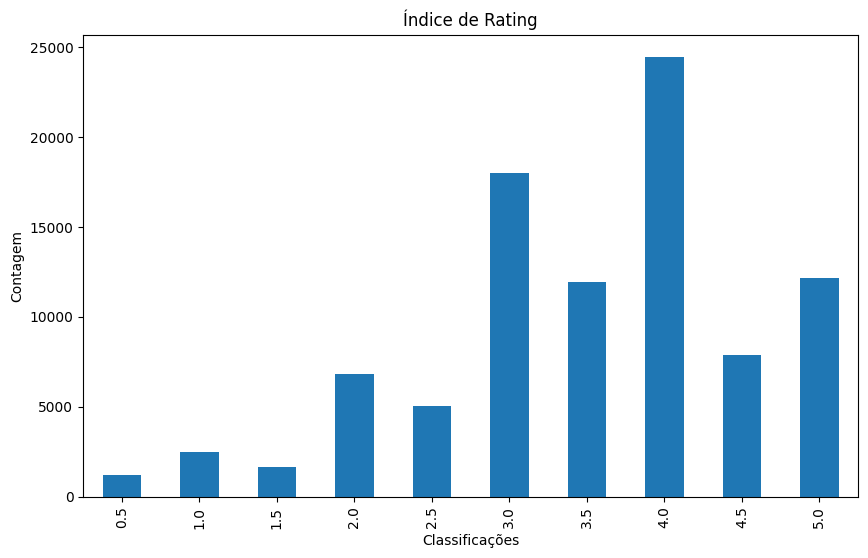

In [ ]:

rating_counts = df['rating'].explode().value_counts()


rating_counts = rating_counts.sort_index()


plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar')
plt.xlabel('Classificações')
plt.ylabel('Contagem')
plt.title('Índice de Rating')
plt.show()


### Gráfico "Índice de MovieId"

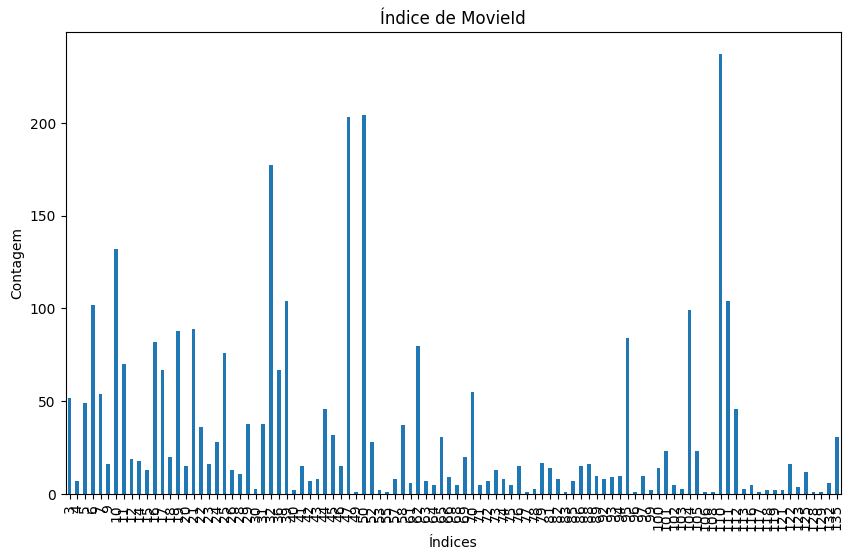

In [ ]:

movieId_counts = df['movieId'].explode().value_counts()


movieId_counts = movieId_counts.sort_index()


plt.figure(figsize=(10, 6))
movieId_counts.head(100).plot(kind='bar')
plt.xlabel('Índices')
plt.ylabel('Contagem')
plt.title('Índice de MovieId')
plt.show()


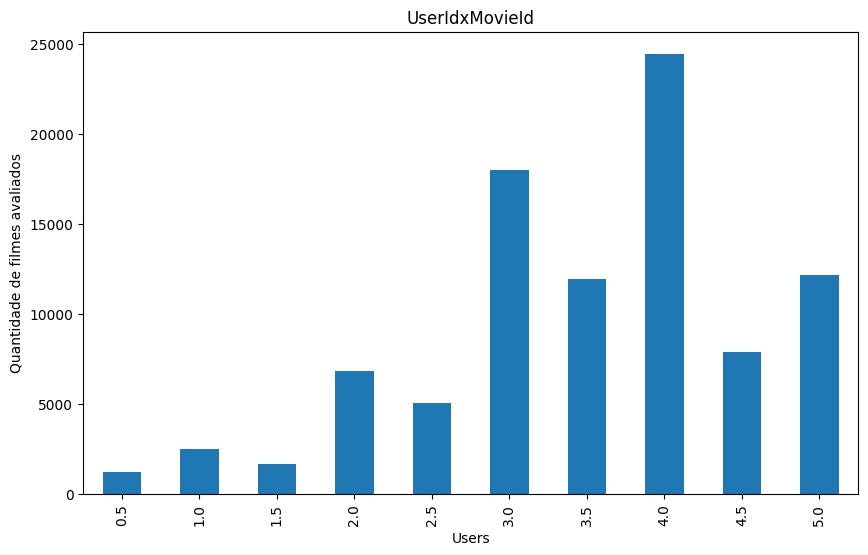

In [ ]:

userId_counts = df['userId'].explode().value_counts()


userId_counts = rating_counts.sort_index()


plt.figure(figsize=(10, 6))
rating_counts.head(150).plot(kind='bar')
plt.xlabel('Users')
plt.ylabel('Quantidade de filmes avaliados')
plt.title('UserIdxMovieId')
plt.show()

#MQQT

In [ ]:
! pip install paho-mqtt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.head(1000)

,movieId,title,userId,rating
325,3,Grumpier Old Men (1995),1,4.0
326,3,Grumpier Old Men (1995),6,5.0
327,3,Grumpier Old Men (1995),19,3.0
328,3,Grumpier Old Men (1995),32,3.0
329,3,Grumpier Old Men (1995),42,4.0
...,...,...,...,...
1336,25,Leaving Las Vegas (1995),178,4.5
1337,25,Leaving Las Vegas (1995),181,1.0
1338,25,Leaving Las Vegas (1995),182,4.5
1339,25,Leaving Las Vegas (1995),187,3.0


In [ ]:
final_dataset = df.pivot(index='movieId',columns='userId',values='rating')
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
3,4.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,5.0
7,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,NaN


In [ ]:
final_dataset.fillna(0,inplace=True)
final_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,5.0
7,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,0.0


In [ ]:
no_user_voted = df.groupby('movieId')['rating'].agg('count')
no_movies_voted = df.groupby('userId')['rating'].agg('count')

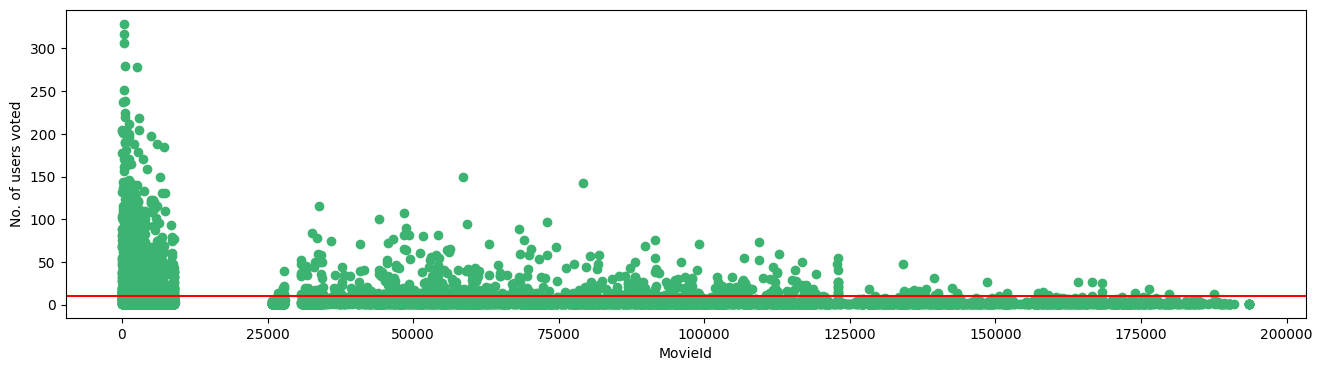

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='mediumseagreen')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

In [ ]:
final_dataset = final_dataset.loc[no_user_voted[no_user_voted > 10].index,:]

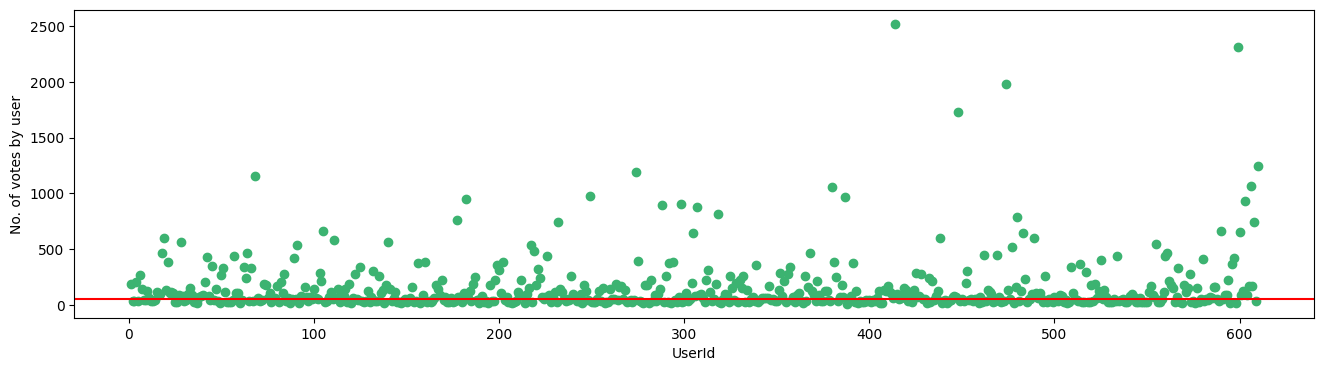

In [ ]:
f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='mediumseagreen')
plt.axhline(y=50,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [ ]:
final_dataset=final_dataset.loc[:,no_movies_voted[no_movies_voted > 50].index]
final_dataset

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0
7,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.5,0.0,0.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168252,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
174055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
176371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sample = np.array([[0,0,3,0,0],[4,0,0,0,2],[0,0,0,0,1]])
sparsity = 1.0 - ( np.count_nonzero(sample) / float(sample.size) )
print(sparsity)

0.7333333333333334


In [ ]:
csr_sample = csr_matrix(sample)
print(csr_sample)

  (0, 2)	3
  (1, 0)	4
  (1, 4)	2
  (2, 4)	1


In [ ]:
csr_data = csr_matrix(final_dataset.values)
final_dataset.reset_index(inplace=True)

In [ ]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def get_movie_recommendation(movie_name):
    n_movies_to_reccomend = 10
    movie_list = df[df['title'].str.contains(movie_name)]  
    if len(movie_list):        
        movie_idx= movie_list.iloc[0]['movieId']
        movie_idx = final_dataset[final_dataset['movieId'] == movie_idx].index[0]
        distances , indices = knn.kneighbors(csr_data[movie_idx],n_neighbors=n_movies_to_reccomend+1)    
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(),distances.squeeze().tolist())),key=lambda x: x[1])[:0:-1]
        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = final_dataset.iloc[val[0]]['movieId']
            idx = df[df['movieId'] == movie_idx].index
            recommend_frame.append({'Title':df.iloc[idx]['title'].values[0],'Distance':val[1]})
        df123 = pd.DataFrame(recommend_frame,index=range(1,n_movies_to_reccomend+1))
        return df123
    else:
        return "No movies found. Please check your input"

In [ ]:
midelo = get_movie_recommendation('Leaving Las Vegas')
midelo

,Title,Distance
1,Barb Wire (1996),0.592728
2,Pulp Fiction (1994),0.591757
3,"Shawshank Redemption, The (1994)",0.578258
4,"American President, The (1995)",0.577573
5,Get Shorty (1995),0.567744
6,Little Women (1994),0.565459
7,Get Shorty (1995),0.545581
8,Shallow Grave (1994),0.521252
9,Richard III (1995),0.520518
10,Seven (a.k.a. Se7en) (1995),0.446040


In [ ]:
import time
import paho.mqtt.client as paho

In [ ]:
def on_message(client, userdata, message):
    time.sleep(1)
    print("received message =",str(message.payload.decode("utf-8")))
    resultado_predicao = str(midelo)
    client.publish("RESULTADOab", resultado_predicao)

In [ ]:
broker="mqtt-dashboard.com"

#create client object client1
client= paho.Client("asdr123")

#Bind function to callback
client.on_message=on_message

print("connecting to broker ",broker)
client.connect(broker) #connect

# #subscribe
print("subscribing ")
client.subscribe("RECEBEab")
time.sleep(2)


#publish
# print("publishing ")
# client.publish("RESULTADOab",str(midelo))
# time.sleep(4)


# client.loop_start() #start loop to process received messages
client.loop_forever()

# client.disconnect() #disconnect
# client.loop_stop() #stop loop


connecting to broker  mqtt-dashboard.com
subscribing 
received message = vem
received message = vem
received message = vem
received message = vem
received message = vem
